Имеются данные о недвижимости в различных районах Бостона

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# 1 Загрузите данные из файла "boston.csv" о недвижимости в различных районах Бостона
data = pd.read_csv("drive/MyDrive/boston.csv")
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 2 Проверьте, что у всех загруженных данных числовой тип
# 3 Проверьте, есть ли по каким-либо признакам отсутствующие данные
# Если отсутствующие данные есть – заполните их медианным значением
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
# 4 Посчитайте коэффициент корреляции для всех пар признаков
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


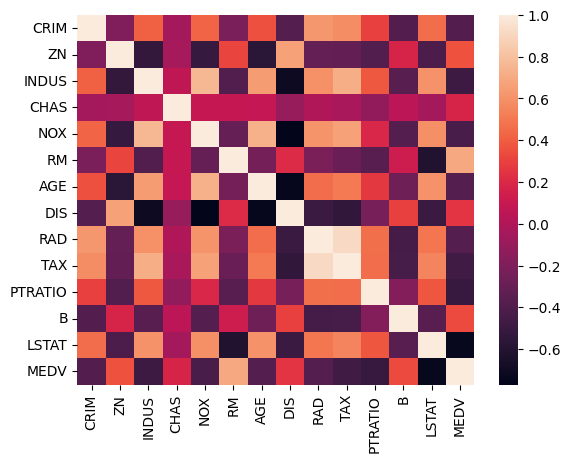

In [ ]:
# 5 С помощью одной из библиотек визуализации постройте тепловую карту (heatmap) по корреляционной матрице
sns.heatmap(data.corr());

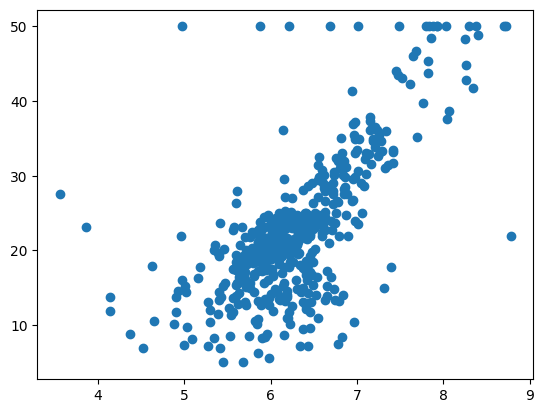

In [ ]:
# 6 Выберите от 4 до 6 признаков (на свое усмотрение), которые в наибольшей степени коррелируют с целевым признаком (ценой недвижимости)
# 7 Для каждого из выбранных признаков в паре с целевым признаком постройте точечную диаграмму
plt.scatter(x = data[['RM']], y = data[['MEDV']]);

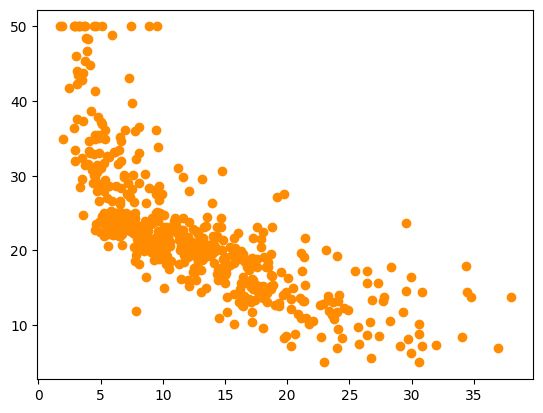

In [ ]:
plt.scatter(x = data[['LSTAT']], y = data[['MEDV']], c = 'darkorange');

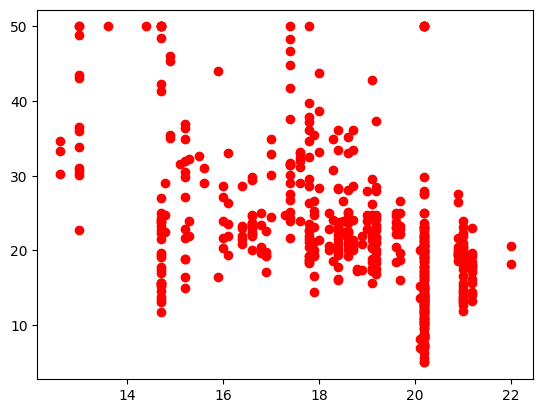

In [ ]:
plt.scatter(x = data[['PTRATIO']], y = data[['MEDV']], c = 'red');

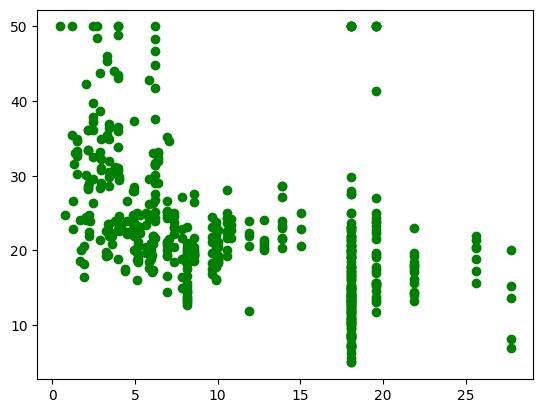

In [ ]:
plt.scatter(x = data[['INDUS']], y = data[['MEDV']], c = 'green');

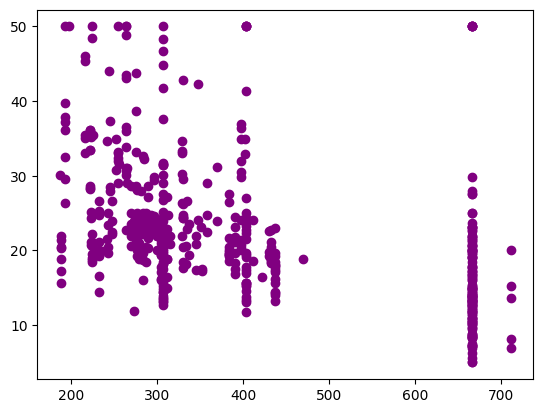

In [ ]:
plt.scatter(x = data[['TAX']], y = data[['MEDV']], c = 'purple');

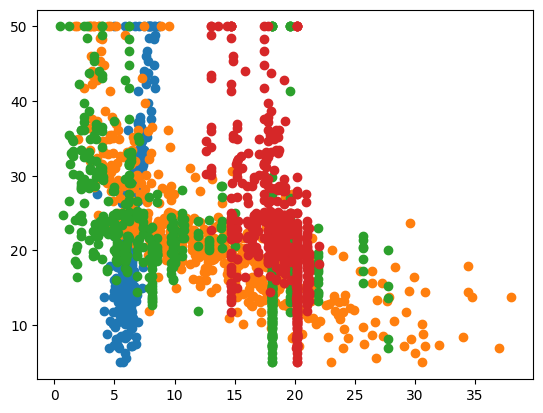

In [ ]:
# 8 Визуально убедитесь, что связь между выбранным признаком и целевым прослеживается
# Если на основе графика считаете, что зависимости нет – исключите этот признак из дальнейшего рассмотрения
plt.scatter(x = data[['RM']], y = data[['MEDV']])
plt.scatter(x = data[['LSTAT']], y = data[['MEDV']])
plt.scatter(x = data[['INDUS']], y = data[['MEDV']])
plt.scatter(x = data[['PTRATIO']], y = data[['MEDV']]);

In [ ]:
# 9 Сформируйте список факторных признаков и целевую переменную
x = data[['RM', 'LSTAT', 'INDUS', 'PTRATIO']]
y = data['MEDV']

In [ ]:
# 10 Выполните разбиение датасета на обучающую и тестовую выборки в соотношении 8:2
# При формировании обучающей и тестовой выборок строки из исходного датафрейма должны выбираться в случайном порядке
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train

,RM,LSTAT,INDUS,PTRATIO
313,6.266,7.90,9.90,18.4
277,6.826,4.16,6.41,17.6
221,6.164,21.46,6.20,17.4
30,5.713,22.60,8.14,21.0
341,7.241,5.49,1.52,15.5
...,...,...,...,...
133,5.822,15.03,21.89,21.2
87,6.121,8.44,4.49,18.5
146,5.628,16.65,19.58,14.7
183,6.563,5.68,2.46,17.8


In [ ]:
x_test

,RM,LSTAT,INDUS,PTRATIO
86,6.015,12.86,4.49,18.5
152,5.012,12.12,19.58,14.7
248,6.433,9.52,5.86,19.1
377,6.794,21.24,18.10,20.2
301,6.590,9.50,6.09,16.1
...,...,...,...,...
331,5.706,12.43,6.06,16.9
427,6.202,14.52,18.10,20.2
122,5.961,17.93,25.65,19.1
11,6.009,13.27,7.87,15.2


In [ ]:
y_train

,MEDV
313,21.6
277,33.1
221,21.7
30,12.7
341,32.7
...,...
133,18.4
87,22.2
146,15.6
183,32.5


In [ ]:
y_test

,MEDV
86,22.5
152,15.3
248,24.5
377,13.3
301,22.0
...,...
331,17.1
427,10.9
122,20.5
11,18.9


In [ ]:
# 11 Из набора линейных моделей библиотеки sklearn возьмите линейную регрессию, обучите ее на обучающем наборе
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 12 Получите векторы прогнозных значений целевой переменной на обучающей и на тестовой выборках
y_model = model.predict(x_train)
y_pred = model.predict(x_test)

In [ ]:
# 13 Посчитайте коэффициент детерминации (R2) и корень из среднеквадратичной ошибки (RMSE) на обучающей и на тестовой выборках
print("Обучающая выборка:")
print('R2 =', r2_score(y_train, y_model))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_model)))
print("\nТестовая выборка:")
print('R2 =', r2_score(y_test, y_pred))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred)))

Обучающая выборка:
R2 = 0.6758578569764921
RMSE = 5.124159673257399

Тестовая выборка:
R2 = 0.6848436146669916
RMSE = 5.545245634317725


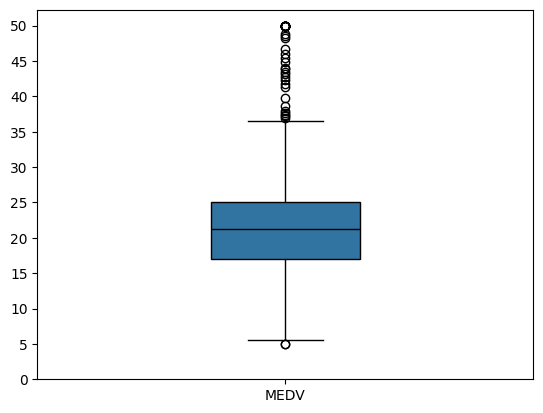

In [ ]:
# 14 Постройте boxplot («ящик с усами») для целевого признака (MEDV)
# Определите, какие значения можно считать выбросами
sns.boxplot(data[['MEDV']], width = 0.3, linecolor = 'black');
plt.yticks(np.arange(0, 55, 5));

In [ ]:
# 15 Отфильтруйте исходные данные, удалив выбросы
# Пересоздайте тестовую и обучающую выборки, переобучите модель
dataFilt = data[(data['MEDV'] > 5) & (data['MEDV'] < 36)]
dataFilt

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
xf = dataFilt[['RM', 'LSTAT', 'INDUS', 'PTRATIO']]
yf = dataFilt['MEDV']
xf_train, xf_test, yf_train, yf_test = train_test_split(xf, yf, test_size = 0.2)
xf_train

,RM,LSTAT,INDUS,PTRATIO
220,6.951,9.71,6.20,17.4
96,6.163,11.34,2.89,18.0
305,6.616,8.93,2.18,18.4
211,5.404,23.98,10.59,18.6
244,5.593,12.50,5.86,19.1
...,...,...,...,...
408,5.617,26.40,18.10,20.2
104,6.167,12.33,8.56,20.9
375,7.313,13.44,18.10,20.2
336,5.869,9.80,5.19,20.2


In [ ]:
xf_test

,RM,LSTAT,INDUS,PTRATIO
288,6.315,7.60,5.32,16.6
315,5.705,11.50,9.90,18.4
183,6.563,5.68,2.46,17.8
62,6.456,6.73,5.13,19.7
392,5.036,25.68,18.10,20.2
...,...,...,...,...
39,6.595,4.32,2.95,18.3
83,6.167,7.51,4.86,19.0
440,5.818,22.11,18.10,20.2
378,6.380,23.69,18.10,20.2


In [ ]:
yf_train

,MEDV
220,26.7
96,21.4
305,28.4
211,19.3
244,17.6
...,...
408,17.2
104,20.1
375,15.0
336,19.5


In [ ]:
yf_test

,MEDV
288,22.3
315,16.2
183,32.5
62,22.2
392,9.7
...,...
39,30.8
83,22.9
440,10.5
378,13.1


In [ ]:
modelFilt = LinearRegression()
modelFilt.fit(xf_train, yf_train)

LinearRegression()

In [ ]:
yf_model = modelFilt.predict(xf_train)
yf_pred = modelFilt.predict(xf_test)

In [ ]:
# Посчитайте показатели R2 и RMSE
# Как они изменились? О чем это говорит?
print("Обучающая выборка:")
print('R2 =', r2_score(y_train, y_model))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_model)))
print("\nТестовая выборка:")
print('R2 =', r2_score(y_test, y_pred))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred)))

print("\nОбучающая выборка без выбросов:")
print('R2 =', r2_score(yf_train, yf_model))
print('RMSE =', np.sqrt(mean_squared_error(yf_train, yf_model)))
print("\nТестовая выборка без выбросов:")
print('R2 =', r2_score(yf_test, yf_pred))
print('RMSE =', np.sqrt(mean_squared_error(yf_test, yf_pred)))

Обучающая выборка:
R2 = 0.6758578569764921
RMSE = 5.124159673257399

Тестовая выборка:
R2 = 0.6848436146669916
RMSE = 5.545245634317725

Обучающая выборка без выбросов:
R2 = 0.6945113533065667
RMSE = 3.422112138023408

Тестовая выборка без выбросов:
R2 = 0.6631953554470587
RMSE = 3.721560830496532


In [ ]:
# 16 Из набора линейных моделей библиотеки sklearn возьмите гребневую регрессию (Ridge)
# Обучите модель, посчитайте показатели R2 и RMSE
modelRidge = Ridge()
modelRidge.fit(xf_train, yf_train)

Ridge()

In [ ]:
yr_model = modelRidge.predict(xf_train)
yr_pred = modelRidge.predict(xf_test)

In [ ]:
print("Обучающая выборка:")
print('R2 =', r2_score(yf_train, yr_model))
print('RMSE =', np.sqrt(mean_squared_error(yf_train, yr_model)))
print("\nТестовая выборка:")
print('R2 =', r2_score(yf_test, yr_pred))
print('RMSE =', np.sqrt(mean_squared_error(yf_test, yr_pred)))

Обучающая выборка:
R2 = 0.6945062603333898
RMSE = 3.42214066388333

Тестовая выборка:
R2 = 0.664353330869814
RMSE = 3.715157732212376


In [ ]:
# 17 Постройте полиномиальную регрессию с использованием полинома 3-й степени
xp = PolynomialFeatures(degree = 3).fit_transform(xf)
xp_train, xp_test, yp_train, yp_test = train_test_split(xp, yf, test_size = 0.2)
print(xp_train.shape, yp_train.shape)
print(xp_test.shape, yp_test.shape)

(368, 35) (368,)
(92, 35) (92,)


In [ ]:
modelPolynom = LinearRegression()
modelPolynom.fit(xp_train, yp_train)

LinearRegression()

In [ ]:
yp_model = modelPolynom.predict(xp_train)
yp_pred = modelPolynom.predict(xp_test)

In [ ]:
# Посчитайте показатели R2 и RMSE
print("Обучающая выборка:")
print('R2 =', r2_score(yp_train, yp_model))
print('RMSE =', np.sqrt(mean_squared_error(yp_train, yp_model)))
print("\nТестовая выборка:")
print('R2 =', r2_score(yp_test, yp_pred))
print('RMSE =', np.sqrt(mean_squared_error(yp_test, yp_pred)))

Обучающая выборка:
R2 = 0.7942271290480581
RMSE = 2.7398922447139977

Тестовая выборка:
R2 = 0.8014439787025208
RMSE = 3.0984321716749754


In [ ]:
# Сравните все полученные результаты
print("Линейная регрессия")
print("\nОбучающая выборка:")
print('R2 =', r2_score(y_train, y_model))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_model)))
print("\nТестовая выборка:")
print('R2 =', r2_score(y_test, y_pred))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nОбучающая выборка без выбросов:")
print('R2 =', r2_score(yf_train, yf_model))
print('RMSE =', np.sqrt(mean_squared_error(yf_train, yf_model)))
print("\nТестовая выборка без выбросов:")
print('R2 =', r2_score(yf_test, yf_pred))
print('RMSE =', np.sqrt(mean_squared_error(yf_test, yf_pred)))
print("\n\nГребневая регрессия (Ridge)")
print("\nОбучающая выборка:")
print('R2 =', r2_score(yf_train, yr_model))
print('RMSE =', np.sqrt(mean_squared_error(yf_train, yr_model)))
print("\nТестовая выборка:")
print('R2 =', r2_score(yf_test, yr_pred))
print('RMSE =', np.sqrt(mean_squared_error(yf_test, yr_pred)))
print("\n\nПолиномиальная регрессия")
print("\nОбучающая выборка:")
print('R2 =', r2_score(yp_train, yp_model))
print('RMSE =', np.sqrt(mean_squared_error(yp_train, yp_model)))
print("\nТестовая выборка:")
print('R2 =', r2_score(yp_test, yp_pred))
print('RMSE =', np.sqrt(mean_squared_error(yp_test, yp_pred)))

Линейная регрессия

Обучающая выборка:
R2 = 0.6758578569764921
RMSE = 5.124159673257399

Тестовая выборка:
R2 = 0.6848436146669916
RMSE = 5.545245634317725

Обучающая выборка без выбросов:
R2 = 0.6945113533065667
RMSE = 3.422112138023408

Тестовая выборка без выбросов:
R2 = 0.6631953554470587
RMSE = 3.721560830496532


Гребневая регрессия (Ridge)

Обучающая выборка:
R2 = 0.6945062603333898
RMSE = 3.42214066388333

Тестовая выборка:
R2 = 0.664353330869814
RMSE = 3.715157732212376


Полиномиальная регрессия

Обучающая выборка:
R2 = 0.7942271290480581
RMSE = 2.7398922447139977

Тестовая выборка:
R2 = 0.8014439787025208
RMSE = 3.0984321716749754
